In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('chat1.txt',header=None,error_bad_lines=False,encoding='utf8')

C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 181: expected 2 fields, saw 3\nSkipping line 183: expected 2 fields, saw 10\nSkipping line 222: expected 2 fields, saw 3\n'


In [3]:
df

,0,1
0,31/05/2024,1:20 pm - Leena: IMG-20240531-WA0025.jpg (fil...
1,31/05/2024,1:21 pm - Leena: IMG-20240531-WA0024.jpg (fil...
2,31/05/2024,1:21 pm - Leena: IMG-20240531-WA0027.jpg (fil...
3,31/05/2024,1:22 pm - Lavanya: Final answer??
4,31/05/2024,1:22 pm - Lavanya: H(z) vendama??
...,...,...
208,12/06/2024,4:13 pm - Leena: 😳
209,12/06/2024,4:13 pm - Leena: Idhenna pudhusa iruku
210,12/06/2024,4:13 pm - Lavanya: Ithukku thaan avanga reply...
211,12/06/2024,4:13 pm - Leena: Apdiya


In [4]:
df=df.drop(0)
df.columns=['Date','Chat']
Message=df["Chat"].str.split("-",n=1,expand=True)
df["Time"]=Message[0]
Message1=Message[1].str.split(":",n=1,expand=True)
df["Name"]=Message1[0]
df["Chat"]=Message1[1]
df=df[["Date","Time","Name","Chat"]]
df

,Date,Time,Name,Chat
1,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0024.jpg (file attached)
2,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0027.jpg (file attached)
3,31/05/2024,1:22 pm,Lavanya,Final answer??
4,31/05/2024,1:22 pm,Lavanya,H(z) vendama??
5,31/05/2024,1:22 pm,Leena,Venum di
...,...,...,...,...
208,12/06/2024,4:13 pm,Leena,😳
209,12/06/2024,4:13 pm,Leena,Idhenna pudhusa iruku
210,12/06/2024,4:13 pm,Lavanya,Ithukku thaan avanga reply pannanga
211,12/06/2024,4:13 pm,Leena,Apdiya


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 1 to 212
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    212 non-null    object
 1   Time    166 non-null    object
 2   Name    165 non-null    object
 3   Chat    165 non-null    object
dtypes: object(4)
memory usage: 8.3+ KB


In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 1 to 212
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    165 non-null    object
 1   Time    165 non-null    object
 2   Name    165 non-null    object
 3   Chat    165 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure the VADER lexicon is downloaded
nltk.download('vader_lexicon')

def sentimentalAnalysis(data, columnname):
    """Perform sentiment analysis on a specific column in the dataframe using VADER."""
    
    # Initialize the sentiment intensity analyzer
    sid = SentimentIntensityAnalyzer()
    
    # Drop any rows with null or empty values in the specified column
    data = data.dropna(subset=[columnname])
    
    # Apply sentiment analysis
    data['scores'] = data[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
    data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
    data['Negative'] = data['scores'].apply(lambda score_dict: score_dict['neg'])
    data['Positive'] = data['scores'].apply(lambda score_dict: score_dict['pos'])
    data['Neutral'] = data['scores'].apply(lambda score_dict: score_dict['neu'])
    
    # Create a column for final positive or negative sentiment based on compound score
    data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
    
    # Clear any previous plots
    plt.clf()
    
    # Count the number of positive and negative sentiments
    postneg = pd.DataFrame(data['comp_score'].value_counts())
    
    return postneg, data

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lavanya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
pos,data_senti=sentimentalAnalysis(df,columnname='Chat')

<Figure size 640x480 with 0 Axes>

In [9]:
data_senti

,Date,Time,Name,Chat,scores,compound,Negative,Positive,Neutral,comp_score
1,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0024.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
2,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0027.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
3,31/05/2024,1:22 pm,Lavanya,Final answer??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
4,31/05/2024,1:22 pm,Lavanya,H(z) vendama??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
5,31/05/2024,1:22 pm,Leena,Venum di,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
...,...,...,...,...,...,...,...,...,...,...
208,12/06/2024,4:13 pm,Leena,😳,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,0.000,pos
209,12/06/2024,4:13 pm,Leena,Idhenna pudhusa iruku,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
210,12/06/2024,4:13 pm,Lavanya,Ithukku thaan avanga reply pannanga,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
211,12/06/2024,4:13 pm,Leena,Apdiya,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos


In [10]:
pos

,comp_score
pos,161
neg,4


In [11]:
df = pd.concat([ data_senti], axis=1)
df

,Date,Time,Name,Chat,scores,compound,Negative,Positive,Neutral,comp_score
1,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0024.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
2,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0027.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
3,31/05/2024,1:22 pm,Lavanya,Final answer??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
4,31/05/2024,1:22 pm,Lavanya,H(z) vendama??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
5,31/05/2024,1:22 pm,Leena,Venum di,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
...,...,...,...,...,...,...,...,...,...,...
208,12/06/2024,4:13 pm,Leena,😳,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,0.000,pos
209,12/06/2024,4:13 pm,Leena,Idhenna pudhusa iruku,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
210,12/06/2024,4:13 pm,Lavanya,Ithukku thaan avanga reply pannanga,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos
211,12/06/2024,4:13 pm,Leena,Apdiya,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
#create vector
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
dtm=tfidf.fit_transform(df["Chat"])

In [14]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [15]:
for index,topic in enumerate(lda_model.components_):
    results=([tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print(results)

['maatum', 'diagram', 'wa0027', '10m', 'ku', 'appo', 'ippo', 'mudila', 'naan', 'thaan']
['wa0004', '20240609', '10', '20240603', '20240607', '20240531', 'jpg', 'img', 'file', 'attached']
['dhan', 'paathen', '11', 'adha', 'wa0008', 'sari', 'irukku', 'cat', 'answer', 'nee']
['ithula', 'illa', 'ithu', 'aa', 'internship', 'decrease', 'di', 'unit', 'ila', 'dii']
['ok', '20240607', 'haan', 'paaru', '20240601', 'jpg', 'img', 'attached', 'file', 'di']


C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
topic_results=lda_model.transform(dtm)
df["Topic"]=topic_results.argmax(axis=1)

In [17]:
df["Topic"].value_counts()

0    49
4    44
1    31
3    27
2    14
Name: Topic, dtype: int64

In [18]:
df

,Date,Time,Name,Chat,scores,compound,Negative,Positive,Neutral,comp_score,Topic
1,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0024.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,1
2,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0027.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,1
3,31/05/2024,1:22 pm,Lavanya,Final answer??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,2
4,31/05/2024,1:22 pm,Lavanya,H(z) vendama??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0
5,31/05/2024,1:22 pm,Leena,Venum di,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,4
...,...,...,...,...,...,...,...,...,...,...,...
208,12/06/2024,4:13 pm,Leena,😳,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,0.000,pos,0
209,12/06/2024,4:13 pm,Leena,Idhenna pudhusa iruku,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0
210,12/06/2024,4:13 pm,Lavanya,Ithukku thaan avanga reply pannanga,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0
211,12/06/2024,4:13 pm,Leena,Apdiya,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0


In [19]:
df

,Date,Time,Name,Chat,scores,compound,Negative,Positive,Neutral,comp_score,Topic
1,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0024.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,1
2,31/05/2024,1:21 pm,Leena,IMG-20240531-WA0027.jpg (file attached),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,1
3,31/05/2024,1:22 pm,Lavanya,Final answer??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,2
4,31/05/2024,1:22 pm,Lavanya,H(z) vendama??,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0
5,31/05/2024,1:22 pm,Leena,Venum di,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,4
...,...,...,...,...,...,...,...,...,...,...,...
208,12/06/2024,4:13 pm,Leena,😳,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,0.000,pos,0
209,12/06/2024,4:13 pm,Leena,Idhenna pudhusa iruku,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0
210,12/06/2024,4:13 pm,Lavanya,Ithukku thaan avanga reply pannanga,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0
211,12/06/2024,4:13 pm,Leena,Apdiya,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0,1.000,pos,0


# Talkative vs Less Talkative


Message Counts per Person:
       Name  MessageCount       Talkative
0   Lavanya            98       Talkative
1     Leena            67  Less Talkative


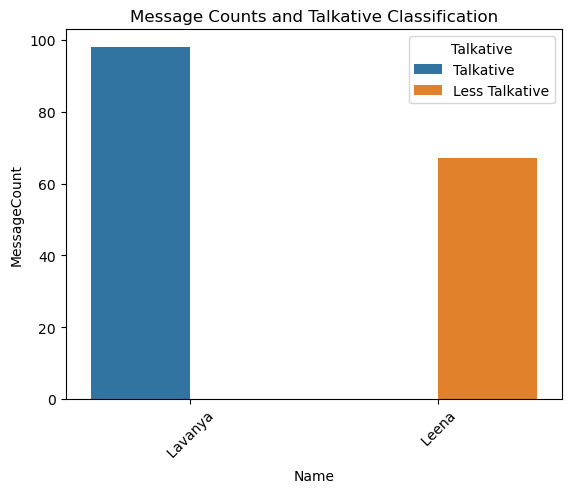

In [20]:
# Group by 'Name' to count messages sent by each person
message_counts = df.groupby('Name').size().reset_index(name='MessageCount')

# Identify talkative vs. less talkative based on message counts
talkative_threshold = message_counts['MessageCount'].quantile(0.75)
message_counts['Talkative'] = message_counts['MessageCount'].apply(lambda count: 'Talkative' if count >= talkative_threshold else 'Less Talkative')

# Display message counts and talkative classification
print("\nMessage Counts per Person:")
print(message_counts)

# Visualize using seaborn or matplotlib as needed
sns.barplot(x='Name', y='MessageCount', data=message_counts, hue='Talkative')
plt.xticks(rotation=45)
plt.title('Message Counts and Talkative Classification')
plt.show()


# Media Count Sent by Each Person

In [21]:
# Count 'Media' occurrences in the 'Chat' column
df['MediaCount'] = df['Chat'].str.count('<Media omitted>')

# Group by 'Name' to sum media counts
media_counts = df.groupby('Name')['MediaCount'].sum().reset_index()

# Display media counts per person
print("\nMedia Counts per Person:")
print(media_counts)



Media Counts per Person:
       Name  MediaCount
0   Lavanya           1
1     Leena           0


# Missed Call

In [22]:
# Count occurrences of 'Missed call'
df['MissedCallCount'] = df['Chat'].str.count('Missed call')

# Sum missed call counts per person
missed_calls = df.groupby('Name')['MissedCallCount'].sum().reset_index()

# Display missed call counts per person
print("\nMissed Call Counts per Person:")
print(missed_calls)



Missed Call Counts per Person:
       Name  MissedCallCount
0   Lavanya                0
1     Leena                0


# Missed Video

In [23]:
# Count occurrences of 'Missed call'
df['MissedvideoCount'] = df['Chat'].str.count('Missed video')

# Sum missed call counts per person
missed_video = df.groupby('Name')['MissedvideoCount'].sum().reset_index()

# Display missed call counts per person
print("\nMissed video Counts per Person:")
print(missed_video)



Missed video Counts per Person:
       Name  MissedvideoCount
0   Lavanya                 0
1     Leena                 0


# deleted messages

In [24]:
# Count occurrences of 'Missed call'
df['deletedmessageCount'] = df['Chat'].str.count('deleted message')

# Sum missed call counts per person
deletedmessage = df.groupby('Name')['deletedmessageCount'].sum().reset_index()

# Display missed call counts per person
print("\ndeletedmessage Counts per Person:")
print(deletedmessage)



deletedmessage Counts per Person:
       Name  deletedmessageCount
0   Lavanya                    0
1     Leena                    0


# Flirt and non-flirt

In [25]:
flirt_keywords = ['flirt', 'date', 'cute', 'handsome', 'beautiful', 'attractive', 'charming', 
                  'sweet', 'gorgeous', 'lovely', 'heart', 'kiss', 'hug', 'romantic', 'babe', 
                  'darling', 'adorable', 'hot', 'wink']

In [26]:
def assign_label(chat_message):
    for word in flirt_keywords:
        if word in chat_message.lower():
            return 'flirt'
    return 'non-flirt'


In [27]:
df['Label'] = df['Chat'].apply(assign_label)

In [28]:
df = df[['Name','Chat', 'Label']]
df=pd.DataFrame(df)
df

,Name,Chat,Label
1,Leena,IMG-20240531-WA0024.jpg (file attached),non-flirt
2,Leena,IMG-20240531-WA0027.jpg (file attached),non-flirt
3,Lavanya,Final answer??,non-flirt
4,Lavanya,H(z) vendama??,non-flirt
5,Leena,Venum di,non-flirt
...,...,...,...
208,Leena,😳,non-flirt
209,Leena,Idhenna pudhusa iruku,non-flirt
210,Lavanya,Ithukku thaan avanga reply pannanga,non-flirt
211,Leena,Apdiya,non-flirt
